In [1]:
import numpy as np
import geopandas as gpd
import contextily as ctx
import json
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from shapely.ops import unary_union
import shapely.speedups
from shapely.geometry import Point, Polygon
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
shapely.speedups.enable()


In [2]:
def Loadgeodata(file):
    gdf = gpd.read_file(file)
    gdf.head()
    return gdf


In [3]:
def makeblacknwhite():
    boundary = gpd.read_file("data/us_nation_border.geojson")

    fig, ax = plt.subplots(figsize=(12, 10))
    boundary.plot(ax=ax, color='gray')
    cities.plot(ax=ax, markersize=3.5, color='black')
    ax.axis("off")
    plt.axis('equal')
    plt.show()
    return boundary


In [4]:
def makeVoronoi():

    
    # data converted to web mercator
    boundary  = boundaries.to_crs(epsg=3395)
    gdf_proj = cities.to_crs(boundary.crs)

    # data is fomarted for Geovoronoi library
    boundary_shape = unary_union(boundary.geometry)
    coords = points_to_coords(gdf_proj.geometry)
   
    


    #calulate voronoi regions
    poly_shapes, pts = voronoi_regions_from_coords(coords, boundary_shape)
    
    #plot the voronoi diagram
    fig, ax = subplot_for_map(figsize=(8,6))
    plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes,coords, pts)
    ax.set_title('49 US cities')
    plt.tight_layout()
    plt.show()

    return poly_shapes
    


In [5]:
def loadufodata(file):
    gdf = gpd.read_file(file)
    gdf.head()
    return gdf

In [6]:
def ufoptsblacknwhite():
    # loads us outline 
    boundary = gpd.read_file("/home/ezap/school_codes/4553-Spatial-DS-Zapata/Assignments/P03/data/us_nation_border.geojson")
    fig, ax = plt.subplots(figsize=(8, 6))
    # outline to color to gray
    boundary.plot(ax=ax, color='gray')
    # points to blue 
    ufos.plot(ax=ax, markersize=3.5, color='blue')
    ax.axis("off")
    plt.axis('equal')
    # shows the map 
    plt.show()
    
    return boundary
    

In [7]:
def polygons(ufos,epsg=None):
    ufos = ufos.to_crs(epsg=3395)
    # print(ufos.crs)
    
    s = gpd.GeoSeries(ufos['geometry'])
    
    
    results = []
    ufos_inpoly = []
    # print(poly_shapes.crs)
    # print(len(poly_shapes))
    for i, poly in poly_shapes.items():
        # print(poly)
        # print(s.within(poly))
        results.append(s.within(poly))
        for r in results:
           if r.any():
               ufos_inpoly.append(r)
               print(ufos_inpoly)

            
                
           

          
                
      
 

    # with open('output.json','w') as f:
    #     json.dump(results,f,indent=3)
      
        
            
    


    # spatIndex = gpd.read_file("/home/ezap/school_codes/4553-Spatial-DS-Zapata/Assignments/P03/data/us_nation_border.geojson")

    # for i, poly in poly_shapes.items():
    #     if epsg:
    #         ufos.to_crs(epsg=3395)

    #     if not poly:
    #         spatIndex = gpd.GeoSeries(ufos["geometry"])
    #     else:
    #         spatIndex.append(ufos["geometry"])

    

            

    



In [8]:
# def hundredufo_cities(gdf, epsg=None):
#     """Insert some geo shape into the spatial index
#     Params:
#         gdf (geoDataFrame) : some geo data
#         epsg (int)         : some new epsg (like 3395 or 4326) if you want to change the crs
#     Returns:
#         None
#     """
#     #results = spatIndex.within(poly)
    
#     global spatIndex

#     if epsg:
#         ufos.to_crs(epsg=3395)

#     if not spatIndex:
#         spatIndex = gpd.GeoSeries(ufos["geometry"])
#     else:
#         spatIndex.append(ufos["geometry"])

In [9]:
# def ufoVoronoi():
#      # data converted to web mercator
#     boundary  = ufoboundaries.to_crs(epsg=3395)
#     gdf_proj = ufos.to_crs(boundary.crs)

#     # data is fomarted for Geovoronoi library
#     boundary_shape = unary_union(boundary.geometry)
#     coords = points_to_coords(gdf_proj.geometry)



#     #calulate voronoi regions
#     poly_shapes, pts = voronoi_regions_from_coords(coords, boundary_shape)
    
#     #plot the voronoi diagram
#     fig, ax = subplot_for_map(figsize=(8,6))
#     plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes,coords, pts)
#     ax.set_title('49 US cities')
#     plt.tight_layout()
#     plt.show()
    

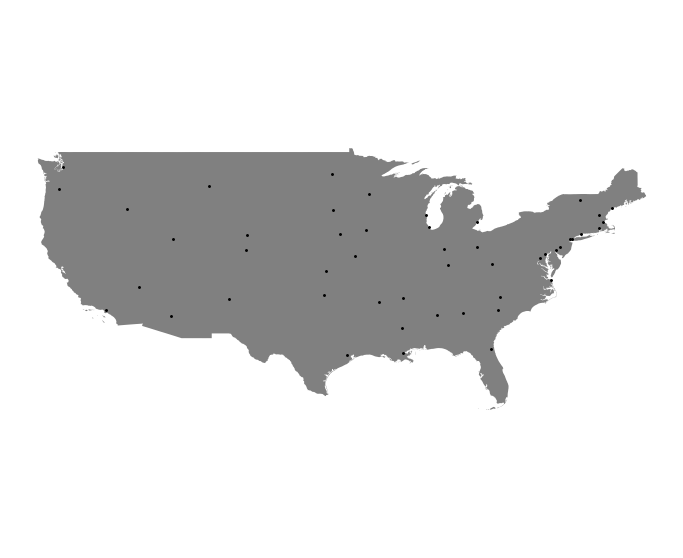

/home/ezap/school_codes/4553-Spatial-DS-Zapata/Assignments/P03/P03/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/ezap/school_codes/4553-Spatial-DS-Zapata/Assignments/P03/P03/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


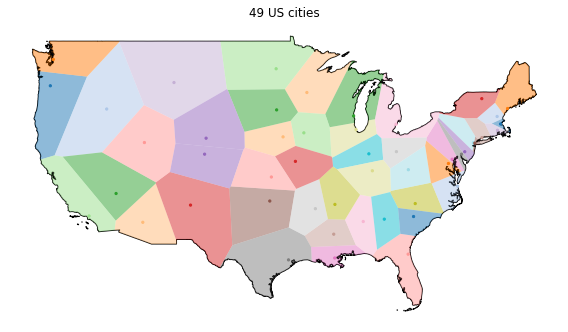

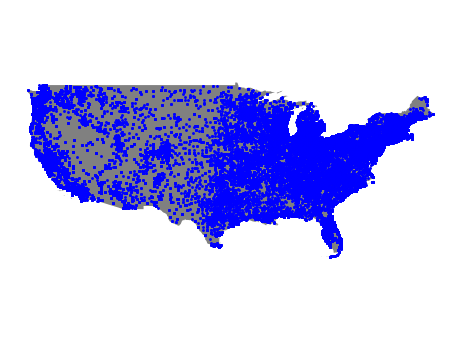

[0        False
1        False
2        False
3        False
4        False
         ...  
95881     True
95882    False
95883    False
95884    False
95885    False
Length: 95886, dtype: bool]
[0        False
1        False
2        False
3        False
4        False
         ...  
95881     True
95882    False
95883    False
95884    False
95885    False
Length: 95886, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
95881     True
95882    False
95883    False
95884    False
95885    False
Length: 95886, dtype: bool]
[0        False
1        False
2        False
3        False
4        False
         ...  
95881     True
95882    False
95883    False
95884    False
95885    False
Length: 95886, dtype: bool, 0        False
1        False
2        False
3        False
4        False
         ...  
95881     True
95882    False
95883    False
95884    False
95885    False
Length: 95886, dtype: bool, 0        False
1        False
2 

In [10]:

if __name__ == "__main__":
    
    cities  = Loadgeodata("/home/ezap/school_codes/4553-Spatial-DS-Zapata/Assignments/P03/cities.geojson")
    boundaries = makeblacknwhite()
    poly_shapes = makeVoronoi()
    ufos = loadufodata("/home/ezap/school_codes/4553-Spatial-DS-Zapata/Assignments/P03/data/ufo_data.geojson")
    ufoboundaries = ufoptsblacknwhite()
    polygons(ufos,epsg=None)
    
    # hundredufo_cities()
    # ufoVoronoi()
    

